# Determination of patterns that form the success of the game

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Converting-the-table-headers-to-a-uniform-style" data-toc-modified-id="Converting-the-table-headers-to-a-uniform-style-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Converting the table headers to a uniform style</a></span></li><li><span><a href="#Checking-for-duplicates" data-toc-modified-id="Checking-for-duplicates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking for duplicates</a></span></li><li><span><a href="#Analysis-of-missing-values" data-toc-modified-id="Analysis-of-missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analysis of missing values</a></span></li><li><span><a href="#Changing-data-types" data-toc-modified-id="Changing-data-types-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Changing data types</a></span></li><li><span><a href="#Calculations" data-toc-modified-id="Calculations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculations</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Creating-a-user-profile-for-each-region" data-toc-modified-id="Creating-a-user-profile-for-each-region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating a user profile for each region</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Statistical-hypothesis-testing" data-toc-modified-id="Statistical-hypothesis-testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Statistical hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Comparison-of-the-two-platforms-user-scores" data-toc-modified-id="Comparison-of-the-two-platforms-user-scores-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Comparison of the two platforms user scores</a></span></li><li><span><a href="#Comparison-of-the-two-genres-user-scores" data-toc-modified-id="Comparison-of-the-two-genres-user-scores-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparison of the two genres user scores</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Results-and-Conclusion" data-toc-modified-id="Results-and-Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results and Conclusion</a></span></li></ul></div>

"Ice" - is the online store, which sells video games all over the world.
<br>Historical data on game sales (*until 2016*), user's and expert's reviews, genres and platforms are available from open sources. We need **to identify patterns that determine whether a game succeeds or not**. This will **allow us to spot potential big winners and plan advertising campaigns**.
<br>Let’s imagine that it’s December 2016 and *we are planning a campaign for 2017*.

**The dataset contains the abbreviation ESRB.
<br>The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.*

**The purpose of the study** is to create a user profile for each region and test two statistical hypotheses:
1. Average user ratings of the Xbox One and PC platforms are the same;
2. Average user ratings for the Action and Sports genres are different.

**Research progress plan**

The study will be carried out in five steps:
1. Data exploration
2. Data preprocessing, performing calculations and adding results to a table
3. Exploratory data analysis
4. Creating a user profile for each region
5. Statistical hypothesis testing

## Data exploration
<a id='explore'></a>

In [1]:
# import of libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Let's describe the data for the table:**

The table contains the following information:
- `Name` — game name
- `Platform` — game platform name
- `Year_of_Release` — game year of release
- `Genre` — game genre
- `NA_sales` — North American sales (millions of copies sold)
- `EU_sales` — sales in Europe (millions of copies sold)
- `JP_sales` — sales in Japan (millions of copies sold)
- `Other_sales` — sales in other countries (millions of copies sold)
- `Critic_Score` — critics' score (maximum of 100)
- `User_Score` — users' score (maximum of 10)
- `Rating` — ESRB rating

There are missing values in the following columns: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` and `Rating`. They need to be examined and replaced if necessary.
<br>It is necessary to change data type of the `Year_of_Release` column into *int* format, and the `User_Score`column into *float* format. 
<br>In addition, it is better to convert the table headers to a uniform style (lowercase).

### Conclusion

Based on a preliminary analysis of the table, it is needed to perform the following procedures:
- to convert the table headers to a uniform lowercase style. The procedures will be performed in section [2.1](#column_names).
- to check data for duplicates. The procedures will be performed in section [2.2](#duplicates).
- to explore missing values. The procedures will be performed in section [2.3](#missed_values).
- to change datatype of some columns. The procedures will be performed in section [2.4](#change_type).
- to perform some calculations necessary for further analysis. The procedures will be performed in section [2.5](#computations).

## Data preprocessing

### Converting the table headers to a uniform style
<a id='column_names'></a>

Let's display the column headings:

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Let's convert the table headers to a uniform lowercase style: 

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

The table headers are converted to snake_case.

### Checking for duplicates
<a id='duplicates'></a>

First, let's calculate how many explicit duplicates are in the table:

In [7]:
df.duplicated().sum()

0

No explicit duplicates were found in the table.

Let's check for implicit duplicates in the following columns: `name`, `platform`, `genre`. <br>The presence of implicit duplicates in other columns is considered unlikely.

In [8]:
# number of unique column values and unique column values itself
print(f"Number of unique values in the 'name' column:", len(df['name'].unique()))
df['name'].sort_values().unique()

Number of unique values in the 'name' column: 11560


array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

The `name` column contains a lot of unique values - 11560 - which are difficult to analyze for implicit duplicates. However, we can see some whitespaces at the beginning of some game names.
<br>Let's get rid of extra spaces and convert all names to lower case:

In [9]:
df['name'] = df['name'].str.lower().str.strip()
print(f"Number of unique values in the 'name' column:", len(df['name'].unique()))

Number of unique values in the 'name' column: 11560


The number of unique values in the `name` column remains the same. <br>Implicit duplicates are not found this way.

Let's check for unique values of the `platform` and `genre` columns:

In [10]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [11]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

No implicit duplicates were found in the table as well.

### Analysis of missing values
<a id='missed_values'></a>

In the [Data exploration](#explore) section we identified missing values in the following columns: `name`, `year_of_release`, `genre`, `critic_score`, `user_score` and `rating`.
<br>First, let's calculate how many missing values are in the table:

In [12]:
df.isna().agg(['sum', 'mean'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
sum,2.00000,0.0,269.000000,2.00000,0.0,0.0,0.0,0.0,8578.000000,6701.000000,6766.000000
mean,0.00012,0.0,0.016093,0.00012,0.0,0.0,0.0,0.0,0.513192,0.400897,0.404786


Few missing values found in `name`, `year_of_release` and `genre` columns.
<br>Because the missing values in these columns make up less than 5% of the total data, we can delete the rows with missing data.
<br>It is also worth noting that missing values in the `year_of_release` column could be replaced with the year of release of the same game on another platform, but in our opinion, this is not entirely correct, since the difference in the release date of the same game on different platforms can be as long as 15 years, and this can significantly distort the results of our study.

In [13]:
df = df.dropna(subset = ['name', 'year_of_release'])
df.isna().agg(['sum', 'mean'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8461.000000,6605.000000,6676.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514534,0.401666,0.405984


In [14]:
print(f"Number of 'tbd' values in the 'user_score' column:", len(df[df['user_score'] == 'tbd']))
print(f"Share of 'tbd' values:", len(df[df['user_score'] == 'tbd'])/len(df))

Number of 'tbd' values in the 'user_score' column: 2376
Share of 'tbd' values: 0.14449039163220628


We also found 'tbd' values in the `user_score` column - about 14% of all data. Most likely, this value may mean 'to be determined' and that there are no user ratings for this game yet, or there are not enough ratings (for example, less than 3 ratings received).
<br>Therefore, to begin with, we can replace these values with NaN:

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float64')
len(df[df['user_score'].isna()]['user_score']) == 6605 + 2376

True

We found a significant number of missing values in the columns with the scores of critics and users, as well as the ESRB rating.
<br>These missing values may have occurred during data transfer/download, or indeed there were no critic and/or user scores and/or ratings from the ESRB organization for these games.

The `critic_score` and `user_score` columns have 51% and 54% missing values respectively, which means that about half of the values in these columns are missing. Therefore, replacing these missing values with the mean or median can significantly distort the results of further analysis. In this regard, **let's leave these missing values in the `critic_score` and `user_score` columns unchanged**.

There are also about 41% missing values in the ESRB `rating` column. Since the values in this column are categorical, replacing such missing values with, for example, the most frequently occurring rating value for a particular genre can significantly distort the results of further analysis. So **let's replace these missing values in the `rating` column with the value `unknown`**:

In [16]:
df['rating'] = df['rating'].fillna(value='unknown')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [17]:
df.isna().agg(['sum', 'mean'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8461.000000,8981.000000,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514534,0.546157,0.0


The missing values have been replaced where necessary.

### Changing data types
<a id='change_type'></a>

It is necessary to convert data types of the `year_of_release` column from `float64` into `int64`, as well as the `user_score` column from `object` into `float64`.

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


The data types have been converted where necessary.

### Calculations
<a id='computations'></a>

Let's calculate the total sales in all regions and write them in a separate column:

In [19]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Necessary calculations added to the dataframe.

### Conclusion

The procedures necessary for further analysis were performed:
- column headers and data types changed, missing values replaced where necessary;
- checked for duplicates;
- the necessary calculations added to the dataframe.

We can start exploratory data analysis.

## Exploratory data analysis

Let's see how many games were released in different years:

In [20]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

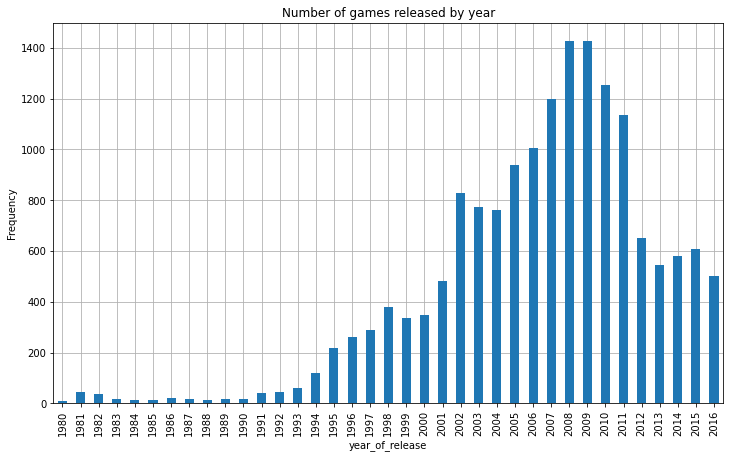

In [21]:
df.groupby('year_of_release')['year_of_release'].count().plot.bar(
    figsize=(12, 7), 
    grid=True,
    zorder=3,
    legend=False,
    ylabel='Frequency',
    title='Number of games released by year');

From the table and graph above we can see that approximately **up to and including the year 2000, the number of released games was significantly less than in subsequent years** (the period from 1980 to 1993 stands out especially, when the number of releases was less than 100 games per year).
<br>**The largest number of releases** in the period occurred **in 2008-2009**.
<br>Most likely, the increase in the number of games was mostly due to the emergence of new platforms, as well as the development of technology and the gaming industry as a whole.

Thus, **data for all periods are not so important for the purposes of further analysis**, in particular, there is no need to include data up to and including 2000 in the analysis, since the number of games released in these years was significantly less than in subsequent years.

Also, using a bar chart, let's see the total number of releases for each console for all time:

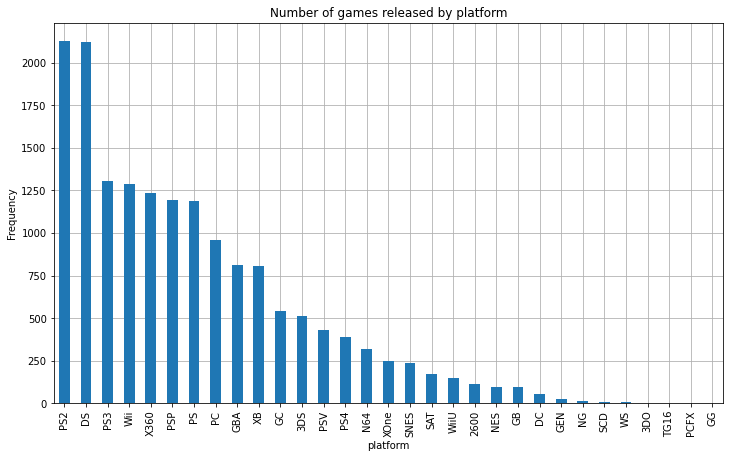

In [22]:
df.groupby('platform')['platform'].count().sort_values(ascending=False).plot.bar(
    figsize=(12, 7), 
    grid=True,
    zorder=3,
    legend=False,
    ylabel='Frequency',
    title='Number of games released by platform');

This chart shows that `PS2` and `DS` platforms released the largest number of games, and `GG`, `PCFX`, `TG16` and `3DO` platforms released the least number of games.

Let's see how sales changed by platform throughout the time period:

In [23]:
total_sales_pivot = df.pivot_table(
        index='platform', 
        columns='year_of_release', 
        values='total_sales', 
        aggfunc='sum',
        margins=True,
        fill_value=0).sort_values(by='All', ascending=False)
total_sales_pivot['operating_years'] = total_sales_pivot.astype(bool).sum(axis=1) - 1
total_sales_pivot

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All,operating_years
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All,11.38,35.68,28.88,16.80,50.35,53.95,37.08,21.70,47.21,73.45,49.37,32.23,76.16,45.99,79.23,88.12,199.15,201.07,256.31,251.11,201.66,331.46,394.97,357.54,418.68,457.82,517.71,604.75,671.50,658.82,590.13,507.58,355.84,361.24,331.53,267.98,129.94,8814.37,37
PS2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56,12
X360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24,12
PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34,11
Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18,11
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78,11
PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58,10
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14,4
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88,8


This table shows that the dynamics of sales for all platforms corresponds to the dynamics of the number of releases by year:
- small sales up to 2000 inclusive;
- in this case, the period from 1980 to 1995 is especially distinguished, when the number of copies sold was less than 100 million pieces per year;
- the largest number of sales in the period occurred in 2008-2009.

At various time intervals, the most popular platforms were:
* in the 80s: `NES`, `2600`;
* in the 90s: `GB`, `SNES`;
* in 00s: `PS2`, `Wii`, `DS`, `GBA`, `PSP`, `XB`, `GC`;
* in 10s: `X360`, `PS3`, `PS4`, `3DS`, `PC`.

In [24]:
total_sales_pivot = total_sales_pivot.drop(index='All')
total_sales_pivot['operating_years'].describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: operating_years, dtype: float64

It can also be noted that the typical period during which new platforms appear and old platforms disappear, on average **is 7 - 8 years**.

Let's choose the platforms with the highest total sales and plot the distribution by years:

In [25]:
total_sales_top10 = total_sales_pivot.head(10).sort_values(by='All', ascending=False)
total_sales_top10 = total_sales_top10.drop(['All', 'operating_years'], axis=1)
total_sales_top10

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PS2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
X360,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52
PS3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
DS,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
PS,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PS4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25
GBA,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PSP,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00


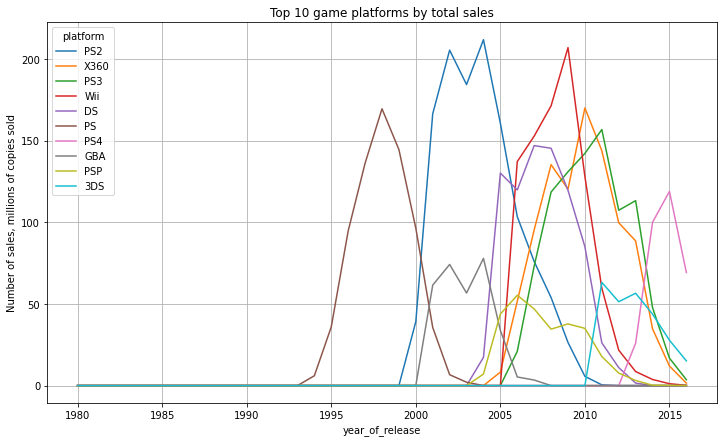

In [26]:
ax = total_sales_top10.T.plot(grid=True, 
                              figsize=(12,7),
                              ylabel='Number of sales, millions of copies sold',
                              title='Top 10 game platforms by total sales')

This graph shows that for the top 10 platforms with the largest total sales, the typical period during which new platforms appear and old platforms disappear is **on average 10 years**.
<br>The maximum lifetime of the platform (sales) among the top 10 sales platforms was 12 years - platforms `PS2`, `X360`, `PSP`.
<br>The shortest period among the top 10 platforms by sales was 4 years - the `PS4` platform (the start of sales in 2013, probably still valid on the date of data extraction).

For further data analysis and forecasting for 2017, it is necessary to determine the actual period and use the data for the corresponding actual period in the future.
<br>Analyzing the last 10 years period, we can see that after 2011 the number of releases began to decline sharply, therefore, the period before 2012 is not good for making a forecast for 2017.
<br>Therefore, we will use the **3-year period from 2014 to 2016 inclusive as the actual period for further analysis**:

In [27]:
total_sales_3years = total_sales_pivot[[2014, 2015, 2016]]
total_sales_3years['Total'] = total_sales_3years.sum(axis=1)
total_sales_3years = total_sales_3years.sort_values(by='Total', ascending=False)
total_sales_3years

/tmp/ipykernel_97/2413919699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sales_3years['Total'] = total_sales_3years.sum(axis=1)


year_of_release,2014,2015,2016,Total
platform,,,,
PS4,100.00,118.90,69.25,288.15
XOne,54.07,60.14,26.15,140.36
3DS,43.76,27.78,15.14,86.68
PS3,47.76,16.82,3.60,68.18
X360,34.74,11.96,1.52,48.22
WiiU,22.03,16.35,4.60,42.98
PC,13.28,8.52,5.25,27.05
PSV,11.90,6.25,4.25,22.40
Wii,3.75,1.14,0.18,5.07


Based on the resulting table, we can conclude the following:
- in terms of sales for the actual period, the `PS4` platform is in the lead, followed by `XOne` and `3DS`.
- the two growing platforms are `PS4` and `XOne`, sales of which grew in 2015, and data for 2016 is less, but it may not be complete.
- among the platforms whose sales are falling in the actual period, the following can be listed: `3DS`, `PS3`, `X360`, `WiiU`, `PC`, `PSV`, `Wii`, `PSP`.
- other platforms did not sell in the actual period.

In our opinion, `PS4` and `XOne` can be considered potentially profitable platforms.

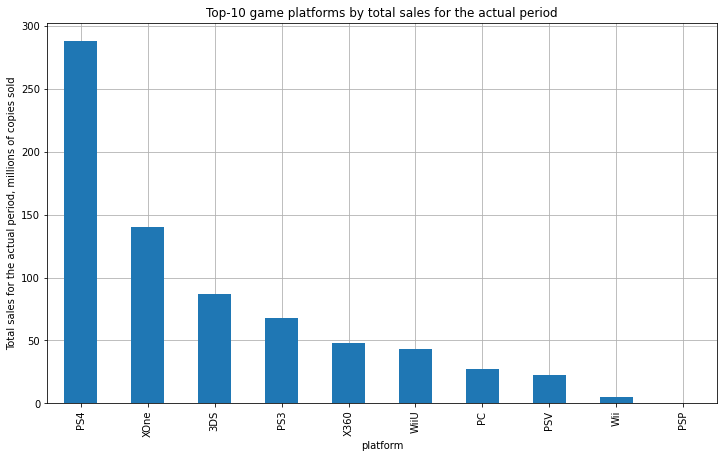

In [28]:
total_sales_3years.head(10).groupby('platform')['Total'].sum().sort_values(ascending=False).plot.bar(
    figsize=(12, 7), 
    grid=True,
    zorder=3,
    legend=False,
    ylabel='Total sales for the actual period, millions of copies sold',
    title='Top-10 game platforms by total sales for the actual period');

Let's create a boxplot of global game sales by potentially profitable platform:

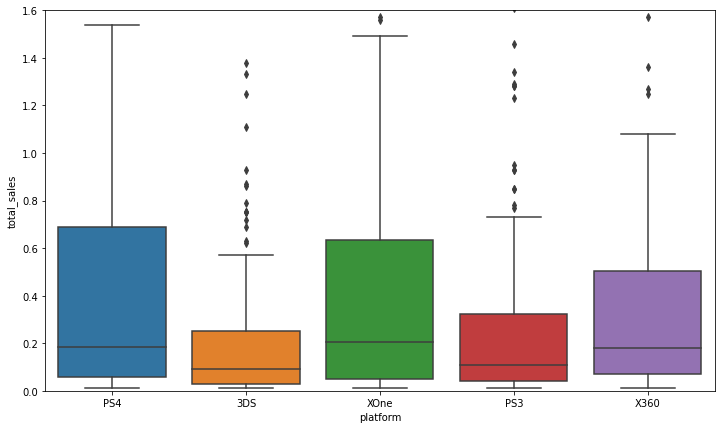

In [29]:
df_actual = df[df.year_of_release > 2013]
platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360']
df_actual_platforms = df_actual[df_actual['platform'].isin(platforms)]
plt.figure(figsize=(12,7))
ax = sns.boxplot(x='platform', y='total_sales', data=df_actual_platforms)
ax.set(ylim=(0, 1.6));

Let's see how sales within one popular platform (`PS4`) are influenced by user and critic scores.
<br>At first, let's create a table with data on the `PS4` platform for the actual period (2014-2016):

In [30]:
ps4_period = df_actual[(df_actual.platform == 'PS4')]
ps4_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Next, we will build a scatterplot and calculate the correlation between scores and sales:

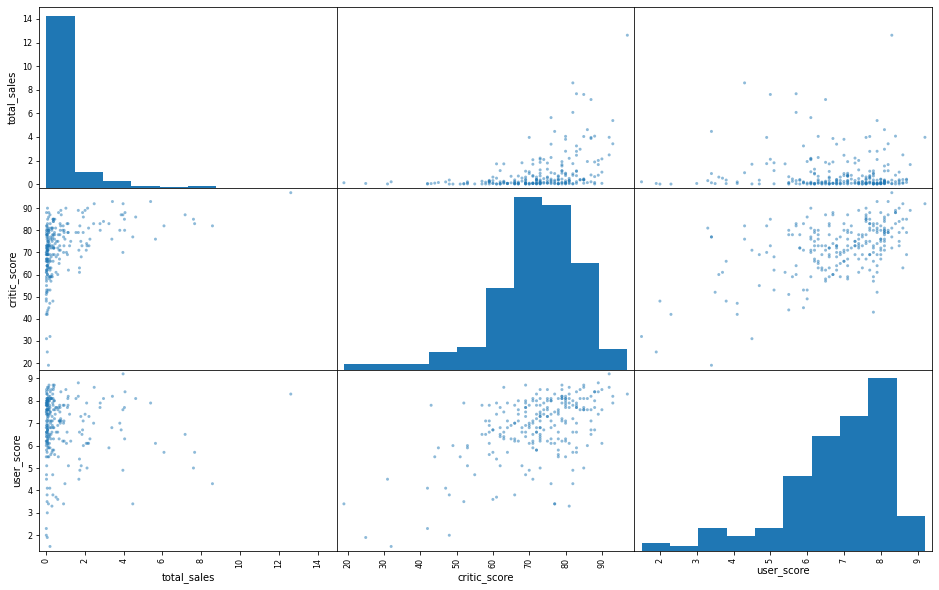

In [31]:
ps4_period_matrix = ps4_period[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(ps4_period_matrix,figsize=(16,10));

In [32]:
parameters = ['critic_score', 'user_score']
for parameter in parameters:
    print(f"Pearson's coefficient - the correlation of sales from the parameter {parameter} is equal to:", 
          ps4_period['total_sales'].corr(ps4_period[parameter]))
print("Pearson's coefficient - the correlation of user_score from the parameter critic_score is equal to:", 
      ps4_period['user_score'].corr(ps4_period['critic_score']))

Pearson's coefficient - the correlation of sales from the parameter critic_score is equal to: 0.40266141068104083
Pearson's coefficient - the correlation of sales from the parameter user_score is equal to: -0.040131589472697356
Pearson's coefficient - the correlation of user_score from the parameter critic_score is equal to: 0.546434245119031


From the scatterplot and calculations we can see that there is a **direct moderate relationship between critic scores and game sales** for the `PS4` platform over the actual period. Indeed, many people study reviews of critics before buying a particular game.
<br>There is no impact of user scores for the `PS4` platform games on sales.
<br>At the same time, for the `PS4` platform, there is a **direct noticeable strength of relationship between user scores and critic scores**. In other words, if the critics like the game, then the user is likely to like it too.

Let's see if these findings correlate with game sales on other platforms.
<br>At first, let's create a table with data on all other platforms, except for `PS4`, for the actual period:

In [33]:
not_ps4_period = df_actual[(df_actual.platform != 'PS4')]
not_ps4_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
96,super smash bros. for wii u and 3ds,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,call of duty: black ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
108,pokemon sun/moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
110,mario kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09


Next, we will build a scatterplot and calculate the correlation between scores and sales for all other platforms:

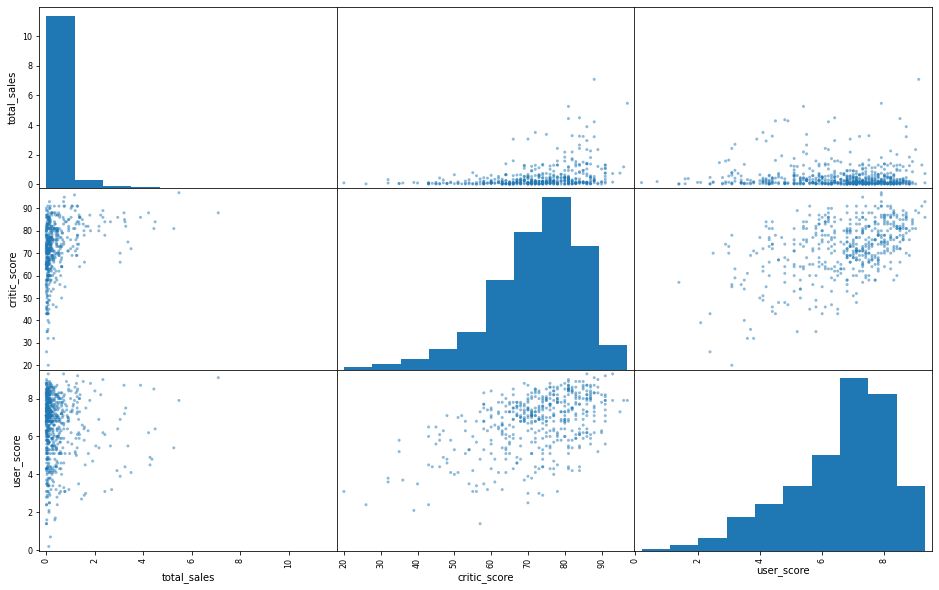

In [34]:
not_ps4_period_matrix = not_ps4_period[['total_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(not_ps4_period_matrix,figsize=(16,10));

In [35]:
for parameter in parameters:
    print(f"Pearson's coefficient - the correlation of sales from the parameter {parameter} is equal to:", 
          not_ps4_period['total_sales'].corr(not_ps4_period[parameter]))
print("Pearson's coefficient - the correlation of user_score from the parameter critic_score is equal to:", 
      not_ps4_period['user_score'].corr(not_ps4_period['critic_score']))

Pearson's coefficient - the correlation of sales from the parameter critic_score is equal to: 0.30947400260011515
Pearson's coefficient - the correlation of sales from the parameter user_score is equal to: -0.023478187237975554
Pearson's coefficient - the correlation of user_score from the parameter critic_score is equal to: 0.48578265548478705


Comparing the results obtained for the `PS4` platform and all other platforms for the actual period, we can conculde the following:
- there is no correlation of user scores on sales of all platforms (including `PS4`).
- there is a direct relationship between critics' scores and game sales for the actual period, but the relationship for all other platforms is weaker (weak) than for the `PS4` platform (moderate).
- at the same time, there is a direct relationship of user scores and critic scores, but the relationship for all other platforms is slightly weaker (moderate) than for the `PS4` platform (noticeable).

Thus, the conclusions made for the `PS4` platform are generally consistent with all other platforms, but the strength of the correlation for all other platforms is less.

We need to look at the most profitable genres.
<br>Total sales is a poor metric for finding the most profitable genre, as high total sales can hide many small games with low sales and/or bad reviews. Therefore, it is better to find a genre where games consistently bring in high income - for this, it is worth considering the average or median sales.
<br>Let's look at the overall distribution of games across genres using **median sales for each genre as a comparison:**

In [36]:
genre_sales_period = df_actual.groupby('genre').agg({'total_sales':'median'}).sort_values(by='total_sales', ascending=False)
genre_sales_period

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


From this summary we can see that the most profitable game genre in terms of the median number of copies sold for the actual period is `Shooter`, and the median game sales in this genre exceed the next most popular genre `Sports` by almost 3 times.
<br>The least profitable game genres for the actual period were `Puzzle` and `Adventure`, the median number of sold copies of games is 11 and 17 times less, respectively, than for games of the most popular genre `Shooter`.

### Conclusion

The dynamics of sales for all platforms corresponds to the dynamics of the number of releases by year:
- a small number of copies sold and games released before 2000 inclusive;
- in this case, the period from 1980 to 1995 is especially distinguished, when the number of copies sold was less than 100 million pieces per year (for releases - the period from 1980 to 1993, when the number of releases was less than 100 games per year);
- the largest number of sales and releases in the period occurred in 2008-2009.

A typical **platform lifetime is on average 7 - 8 years**, for the top 10 platforms with the highest total sales - an average of **10 years**.

We used the **3-year period from 2014 to 2016 inclusive as the actual period for analysis**.

In terms of sales for the actual period, the `PS4` platform is leading, followed by `XOne` and `3DS`.
<br>In our opinion, the **potentially profitable platforms are `PS4` and `XOne`**, where sales increased in 2015, and the data for 2016 is less, but it may not be complete.

**User scores** on all platforms (including `PS4`) **have no correlation with sales**.
<br>There is a **direct relationship between critic scores and game sales** over the actual period, but the relationship for all other platforms is weaker (weak) than for the `PS4` platform (moderate).
<br>At the same time, there is a **direct correlation of critics' scores and users' scores**, but the relationship for all other platforms is weaker (moderate) than for the `PS4` platform (noticeable).

**The most profitable game genre** in terms of median number of copies sold for the actual period **is `Shooter`**, and the median sales of games in this genre exceed the next genre `Sports` by almost 3 times.
<br>**The least profitable** game genres for the actual period **were `Adventure` and `Puzzle`**, the median number of sold copies of games for them is 17 and 11 times less, respectively, than for games of the most popular genre `Shooter`.

## Creating a user profile for each region

Let's determine for the user of each region (NA, EU, JP) the most popular platforms (top 5) for the actual period:

In [37]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    temp = df_actual.groupby('platform').agg({region:'sum'}).sort_values(by=region, ascending=False)
    temp['share_in_region_sales'] = temp[region]/temp[region].sum()
    display(temp.head())

,na_sales,share_in_region_sales
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624


,eu_sales,share_in_region_sales
platform,,
PS4,130.04,0.480420
XOne,46.25,0.170866
PS3,25.54,0.094355
PC,17.97,0.066388
3DS,16.12,0.059554


,jp_sales,share_in_region_sales
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526


From the summary tables above we can conclude the following:
- sales **in North America** for the actual period:
    - Approximately 35% and 29% of sales in North America account for platforms `PS4` and `XOne` respectively.
    - 1/10 of sales related to the `X360` platform.
    - Approximately 8% of all sales in the region related to the `3DS` and `PS3` platforms.
    - all other platforms in this region account for a total of about 10% of all sales.
- sales **in Europe** for the actual period:
    - slightly less than half (48%) of sales in Europe account for the `PS4` platform.
    - the second most popular platform in the region - `XOne` - accounts for approximately 17% of all sales in the region.
    - The share of the `PS3` platform in this region was 9%.
    - Approximately 7% and 6% of sales related to `PC` and `3DS` platforms, respectively.
    - all other platforms in the region together account for about 13% of all sales.
- sales **in Japan** for the actual period:
    - a little less than half (48%) of sales in Japan account for the `3DS` platform.
    - Approximately 16% of sales related to the `PS4` and `PSV` platforms.
    - the share of the `PS3` platform in this region was 12%, and the `WiiU` platform - 8%.
    - all other platforms in this region account for about 1% of all sales in total.

Thus, only three platforms are in the top 5 in all regions - `PS4`, `3DS` and `PS3`.
<br>Also across all regions, the top 5 platforms account for over 85% of all sales in each region.

Let's determine for the user of each region (NA, EU, JP) the most popular genres (top 5) for the actual period:

In [38]:
for region in regions:
    temp = df_actual.groupby('genre').agg({region:'sum'}).sort_values(by=region, ascending=False)
    temp['share_in_region_sales'] = temp[region]/temp[region].sum()
    display(temp.head())

,na_sales,share_in_region_sales
genre,,
Shooter,79.02,0.278181
Action,72.53,0.255333
Sports,46.13,0.162395
Role-Playing,33.47,0.117827
Misc,15.05,0.052982


,eu_sales,share_in_region_sales
genre,,
Action,74.68,0.275898
Shooter,65.52,0.242057
Sports,45.73,0.168945
Role-Playing,28.17,0.104071
Racing,14.13,0.052202


,jp_sales,share_in_region_sales
genre,,
Role-Playing,31.16,0.334730
Action,29.58,0.317757
Fighting,6.37,0.068428
Misc,5.61,0.060264
Shooter,4.87,0.052315


From the summary tables above we can conclude the following:
- sales **in North America** for the actual period:
    - Approximately 28% and 26% of sales in North America come from the `Shooter` and `Action` genres, respectively.
    - Approximately 16% and 12% of game sales account for the `Sports` and `Role-Playing` genres, respectively.
    - The share of the `Misc` genre in this region was approximately 5%.
    - all other genres in the region account for a total of about 13% of all sales.
- sales **in Europe** for the actual period:
    - Approximately 28% and 24% of sales in Europe come from the `Action` and `Shooter` genres, respectively.
    - Approximately 17% and 10% of game sales account for the `Sports` and `Role-Playing` genres, respectively.
    - The share of the `Racing` genre in this region was approximately 5%.
    - all other genres in the region together account for about 16% of all sales.
- sales **in Japan** for the actual period:
    - Approximately 33% and 32% of game sales in Japan come from the `Role-Playing` and `Action` genres, respectively.
    - Approximately 7% and 6% of sales account for the `Fighting` and `Misc` genres, respectively.
    - The share of sales of `Shooter` games in this region was approximately 5%.
    - all other genres in the region account for a total of about 17% of all sales.

Thus, only three genres are in the top 5 in all regions - `Action`, `Shooter` and `Role-Playing`.
<br>Also, in all regions, the top 5 genres account for more than 80% of all sales in each region.

Let's determine for the user of each region (NA, EU, JP) whether the ESRB rating affects sales in a particular region for the actual period.
<br>Since the rating is a qualitative parameter, applying Pearson's correlation coefficient to it is incorrect, so let's analyze it by grouping it into categories and calculating average sales:

In [39]:
for region in regions:
    display(df_actual.groupby('rating').agg({region:'mean'}).sort_values(by=region, ascending=False))

,na_sales
rating,
M,0.363849
E,0.231689
E10+,0.179622
T,0.143727
unknown,0.086409


,eu_sales
rating,
M,0.352604
E,0.265114
E10+,0.141405
T,0.125720
unknown,0.078705


,jp_sales
rating,
unknown,0.075968
T,0.054539
E,0.040822
M,0.030226
E10+,0.024108


From the summary tables above we can conclude the following:
- average sales **in North America** for the actual period:
    - on average, about 364 thousand copies sold accounted for games rated `M`.
    - 232 thousand with an `E` rating.
    - 180 thousand with `E10+` rating.
    - 144 thousand with a rating of `T`.
    - 86 thousand without a rating, or their rating is not known.
- sales **in Europe** for the actual period:
    - on average, about 353 thousand copies sold accounted for games rated `M`.
    - 265 thousand with an `E` rating.
    - 141 thousand with `E10+` rating.
    - 126 thousand with a rating of `T`.
    - 79 thousand without a rating, or their rating is not known.
- sales **in Japan** for the actual period:
    - on average, about 76 thousand copies sold are unrated games or their rating is unknown.
    - 55 thousand with a rating of `T`.
    - 41 thousand with an `E` rating.
    - 30 thousand with `M` rating.
    - 24 thousand with `E10+` rating.

Thus, the most popular games in all regions are with ratings `M`, `E`, `E10+` and `T`.
<br>In all countries except Japan, the top ratings are the same.
<br>But in Japan the most popular games are rated `T`.

### Conclusion

For users in **North America**:
- Most popular platforms: `PS4`, `XOne`, `X360`, `3DS`, `PS3`;
- Most popular genres: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`;
- Most popular known game ratings: `M`, `E`, `E10+`, `T`.

For users from **Europe**:
- Most popular platforms: `PS4`, `XOne`, `PS3`, `PC`, `3DS`;
- The most popular genres: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`;
- Most popular known game ratings: `M`, `E`, `E10+`, `T`.

For **Japan** users:
- Most popular platforms: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`;
- The most popular genres: `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`;
- Most popular known game ratings: `T`, `E`, `M`, `E10+`.

Thus, the profile of a user from North America is largely the same as that of a user from Europe, but differs significantly from users from Japan. This may be due to the cultural differences of Asia, from similar European and American cultures.
<br>In addition, the most popular platform in Japan in the actual period - `3DS` - was created by the Japanese company Nintendo, as well as the game console `WiiU`, which is included in the top 5 gaming platforms in Japan in the actual period, but did not get into the top -5 in Europe and North America.
<br>Differences in the consoles used, in turn, affect the popular genres in these regions. So, Nintendo does not have a single game in the `Shooter` genre at all.

## Statistical hypothesis testing

### Comparison of the two platforms user scores

Our hypothesis is as follows: the average user score of the `Xbox One` and `PC` platforms are the same for the actual period.
<br>Let's formulate **H₀**: The average user score of the `Xbox One` platform is **equal** to the average user score of the `PC` platform.
<br>Then **two-sided alternative hypothesis H₁**: the average user score of the `Xbox One` platform is **not equal** to the average user score of the `PC` platform.
<br>The null hypothesis is rejected if the obtained value of the statistic is less than the given significance level.
<br>Let's set the critical level of statistical significance to 0.01.
<br>Since the samples are of different sizes, we will specify the equal_var=False parameter, which means that the variances of the populations are different:

In [40]:
# testing the hypothesis that the mean of two populations is equal
alpha = .01
results = st.ttest_ind(
    df_actual[(df_actual.platform == 'XOne') & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.platform == 'PC') & (df_actual.user_score.notna())]['user_score'], 
    equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("reject H₀")
else:
    print("do not reject H₀")

p-value: 0.11601398086668832
do not reject H₀


The resulting p-value indicates that the probability of getting this or more difference randomly is almost 12%. This is clearly too high probability to conclude that there is a significant difference between the average user ratings of the platforms.
<br>Therefore, **we have no reason to believe that the average user ratings of the `Xbox One` and `PC` platforms are significantly different**.<br>Let's confirm this conclusion by data:

In [41]:
platforms = ['XOne', 'PC']
for platform in platforms:
    print(f"The average user score of {platform} platform is:", 
      df_actual[(df_actual.platform == platform) & (df_actual.user_score.notna())]['user_score'].mean())

The average user score of XOne platform is: 6.594545454545456
The average user score of PC platform is: 6.298360655737705


### Comparison of the two genres user scores

Our hypothesis is as follows: the average user score of the `Action` and `Sports` genres are different for the actual period.
<br>Let's formulate **H₀**: the average user score of the `Action` genre is **equal** to the average user score of the `Sports` genre.
<br>Then **two-tailed alternative hypothesis H₁**: the average user score of the `Action` genre is **not equal** to the average user score of the `Sports` genre.
<br>The null hypothesis is rejected if the obtained value of the statistic is less than the given significance level.
<br>Let's set the critical level of statistical significance to 0.01.
<br>Since the samples are of different sizes, we will specify the equal_var=False parameter, which means that the variances of the populations are different:

In [42]:
# testing the hypothesis that the mean of two populations is equal
alpha = .01
results = st.ttest_ind(
    df_actual[(df_actual.genre == 'Action') & (df_actual.user_score.notna())]['user_score'],
    df_actual[(df_actual.genre == 'Sports') & (df_actual.user_score.notna())]['user_score'], 
    equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("reject H₀")
else:
    print("do not reject H₀")

p-value: 1.1825550382644557e-14
reject H₀


The resulting p-value indicates that the probability of getting this or more difference randomly is 0%.
<br>We can conclude that **the average user rating of the `Action` genre is not equal to the average user rating of the `Sports` genre**. <br>Let's confirm this conclusion by data:

In [43]:
genres = ['Action', 'Sports']
for genre in genres:
    print(f"The average user score of {genre} genre is:",
          df_actual[(df_actual.genre == genre) & (df_actual.user_score.notna())]['user_score'].mean())

The average user score of Action genre is: 6.760606060606061
The average user score of Sports genre is: 5.2251968503937


### Conclusion

Testing the hypothesis about the equality of the average user score of the `Xbox One` and `PC` platforms, we came to the conclusion that we have no reason to assert that the average user score of the `Xbox One` and `PC` platforms differ significantly over the actual period.

Testing the hypothesis about the equality of the average user score of the `Action` and `Sports` genres, we came to the conclusion that the average user score of the `Action` and `Sports` genres differ in the actual period.

## Results and Conclusion

In order to plan advertising campaigns online store "Ice" wants to know patterns that determine whether a game succeeds or not. We were provided with historical data on game sales (until 2016), user's and expert's reviews, genres and platforms.

We loaded and examined the provided data, and then performed the following transformations:
- checked the data for duplicates - no explicit and implicit duplicates were found in the table;
- replaced 'tbd' values in the `user_score` column (about 14% of all data) with NaN;
- identified a lot of missing values in several columns:
    - We decided to delete the rows with missing data in the following columns: `name`, `year_of_release` and `genre`, because the missing values in these columns make up less than 5% of the total data. 
    - We decided to leave missing values in the `critic_score` and `user_score` columns unchanged (51% and 54% missing values respectively), because replacing these missing values with the mean or median can significantly distort the results of further analysis.
    - We decided to replace missing valuese in the ESRB `rating` column (about 41% missing values) with the value `unknown`, since the values in this column are categorical, replacing such missing values with, for example, the most frequently occurring rating value for a particular genre can significantly distort the results of further analysis;
- converted the data types of the `year_of_release` column into `int64`, as well as the `user_score` column into `float64`;
- calculated the amount of total sales in all regions.

Next, we performed the following procedures:
- explored the data and noticed the following:
    - The dynamics of sales for all platforms corresponds to the dynamics of the number of releases by year:
        - a small number of copies sold and games released before 2000 inclusive;
        - in this case, the period from 1980 to 1995 is especially distinguished, when the number of copies sold was less than 100 million pieces per year (for releases - the period from 1980 to 1993, when the number of releases was less than 100 games per year);
        - the largest number of sales and releases in the period occurred in 2008-2009.

    - We decided to use the **3-year period from 2014 to 2016 inclusive as the actual period for analysis**.

    - In terms of sales for the actual period, the `PS4` platform is leading, followed by `XOne` and `3DS`.
<br>In our opinion, the **potentially profitable platforms are `PS4` and `XOne`**, where sales increased in 2015, and the data for 2016 is less, but it may not be complete.

    - **User scores** on all platforms (including `PS4`) **have no correlation with sales**.
<br>There is a **direct relationship between critic scores and game sales** over the actual period, but the relationship for all other platforms is weaker (weak) than for the `PS4` platform (moderate).
<br>At the same time, there is a **direct correlation of critics' scores and users' scores**, but the relationship for all other platforms is weaker (moderate) than for the `PS4` platform (noticeable).

    - **The most profitable game genre** in terms of median number of copies sold for the actual period **is `Shooter`**, and the median sales of games in this genre exceed the next genre `Sports` by almost 3 times.
<br>**The least profitable** game genres for the actual period **were `Adventure` and `Puzzle`**, the median number of sold copies of games for them is 17 and 11 times less, respectively, than for games of the most popular genre `Shooter`.

- analyzed the users' behavior for each region and noticed the following:
    - For users in **North America**:
        - Most popular platforms: `PS4`, `XOne`, `X360`, `3DS`, `PS3`;
        - Most popular genres: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`;
        - Most popular known game ratings: `M`, `E`, `E10+`, `T`.
    
    - For users from **Europe**:
        - Most popular platforms: `PS4`, `XOne`, `PS3`, `PC`, `3DS`;
        - The most popular genres: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`;
        - Most popular known game ratings: `M`, `E`, `E10+`, `T`.
    
    - For **Japan** users:
        - Most popular platforms: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`;
        - The most popular genres: `Role-Playing`, `Action`, `Fighting`, `Misc`, `Shooter`;
        - Most popular known game ratings: `T`, `E`, `M`, `E10+`.

    Thus, the profile of a user from North America is largely the same as that of a user from Europe, but differs significantly from users from Japan. This may be due to the cultural differences of Asia, from similar European and American cultures.
    <br>In addition, the most popular platform in Japan in the actual period - `3DS` - was created by the Japanese company Nintendo, as well as the game console `WiiU`, which is included in the top 5 gaming platforms in Japan in the actual period, but did not get into the top -5 in Europe and North America.
    <br>Differences in the consoles used, in turn, affect the popular genres in these regions. So, Nintendo does not have a single game in the `Shooter` genre at all.

-  tested two hypotheses:
    - about the equality of the average user score of the `Xbox One` and `PC` platforms, we came to the conclusion that we have no reason to assert that the average user score of the `Xbox One` and `PC` platforms differ significantly over the actual period.
    - about the equality of the average user score of the `Action` and `Sports` genres, we came to the conclusion that the average user score of the `Action` and `Sports` genres differ in the actual period.
    
Therefore, potentially popular in 2017 will be games on `PS4` and `XOne` platforms.
<br>The most popular game genres in all regions except Japan are `Action` and `Shooter`, in Japan - `Role-Playing`.
<br>Most played games in all regions except Japan, rated `M` by ESRB, but `T` in Japan.